<a href="https://colab.research.google.com/github/naot97/Computer-Graphic/blob/master/digit_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Load the data
train = pd.read_csv("/content/drive/My Drive/digit-recognizer/train.csv")
test = pd.read_csv("/content/drive/My Drive/digit-recognizer/test.csv")


In [0]:
print(train.shape)
Labels = train["label"]
print(Labels)
X_train = train.drop(labels = ["label"], axis = 1)
print(X_train.shape)

(42000, 785)
0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
(42000, 784)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

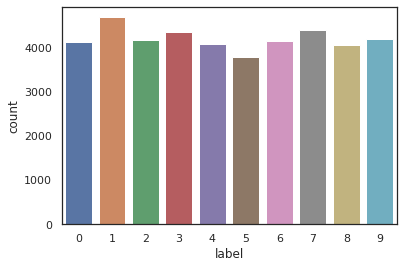

In [0]:
g = sns.countplot(Labels)
Labels.value_counts()


In [0]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.values.reshape((-1,28,28,1))
test = test.values.reshape((-1,28,28,1))

Y_train = to_categorical(Labels, num_classes = 10)



In [0]:
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
#g = plt.imshow(X_train[0][:,:,0])
def append_element(list, list2):
  for element in list2:
    list.append(element)

  return list



l = np.array(list(Labels))

temp_x_val = []
temp_y_val = []
temp_x_train = []
temp_y_train = []

for i in range(10):
  index = [j for j in range(len(l)) if l[j] == i ]
  x_train_i = X_train[index]
  y_train_i = Y_train[index]
  x_train_i, x_val_i, y_train_i, y_val_i =  train_test_split(x_train_i, y_train_i, test_size = 0.1, random_state=2)
  temp_x_val = append_element(temp_x_val,x_val_i)
  temp_y_val = append_element(temp_y_val,y_val_i)
  temp_x_train = append_element(temp_x_train,x_train_i)
  temp_y_train = append_element(temp_y_train,y_train_i)
  #temp_x_val = temp_x_val + [(x_val_i)]
  #temp_y_val = temp_y_val +[(y_val_i)]
  #temp_x_train = temp_x_train + [(x_train_i)]
  #temp_y_train = temp_y_train + [(y_train_i)]


X_train = np.array(temp_x_train)
Y_train = np.array(temp_y_train)
X_val   = np.array(temp_x_val)
Y_val   = np.array(temp_y_val)

#X_train = np.squeeze(X_train,axis=0)
#Y_train = np.squeeze(Y_train,axis=0)
#X_val = np.squeeze(X_val,axis=0)
#Y_val = np.squeeze(Y_val,axis=0)

print(X_train.shape)

(37794, 28, 28, 1)


In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation ='relu', input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 40 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 128


In [0]:
# With data augmentation to prevent overfitting (accuracy 0.99286)
print(X_val.shape)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

print(X_train.shape)

(4206, 28, 28, 1)
(37794, 28, 28, 1)


In [0]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


Epoch 1/40
 - 10s - loss: 0.4945 - acc: 0.8412 - val_loss: 0.0655 - val_acc: 0.9784
Epoch 2/40
 - 9s - loss: 0.1452 - acc: 0.9562 - val_loss: 0.0347 - val_acc: 0.9879
Epoch 3/40
 - 9s - loss: 0.0994 - acc: 0.9692 - val_loss: 0.0390 - val_acc: 0.9883
Epoch 4/40
 - 9s - loss: 0.0836 - acc: 0.9751 - val_loss: 0.0349 - val_acc: 0.9881
Epoch 5/40
 - 9s - loss: 0.0750 - acc: 0.9779 - val_loss: 0.0283 - val_acc: 0.9914
Epoch 6/40
 - 9s - loss: 0.0675 - acc: 0.9800 - val_loss: 0.0275 - val_acc: 0.9933
Epoch 7/40
 - 10s - loss: 0.0629 - acc: 0.9813 - val_loss: 0.0221 - val_acc: 0.9929
Epoch 8/40
 - 9s - loss: 0.0566 - acc: 0.9831 - val_loss: 0.0233 - val_acc: 0.9936
Epoch 9/40
 - 9s - loss: 0.0568 - acc: 0.9832 - val_loss: 0.0200 - val_acc: 0.9945
Epoch 10/40
 - 9s - loss: 0.0536 - acc: 0.9843 - val_loss: 0.0244 - val_acc: 0.9938
Epoch 11/40
 - 9s - loss: 0.0512 - acc: 0.9850 - val_loss: 0.0218 - val_acc: 0.9943
Epoch 12/40
 - 9s - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0206 - val_acc: 0.9943

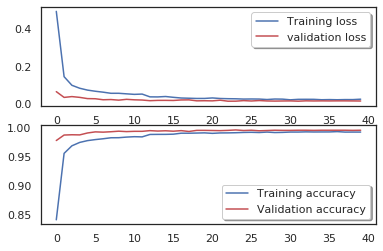

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

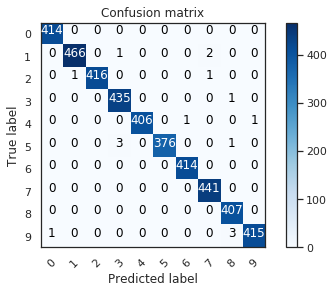

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

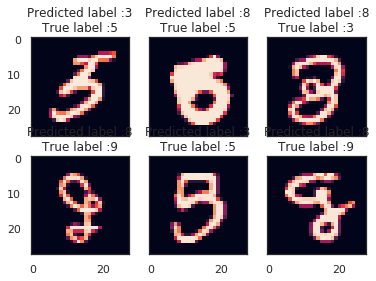

In [0]:

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [0]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)
